In [1]:
# Import Needed Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import pathlib
import random
import math
import splitfolders


In [2]:
for dir_name, _, filenames in os.walk("/Users/rish/Desktop/Mini-Projects/MLProjects/Data/food_not_food"):
    for filename in filenames:
        print(os.path.join(dir_name, filename))

/Users/rish/Desktop/Mini-Projects/MLProjects/Data/food_not_food/data/food (204) (Copy).jpg
/Users/rish/Desktop/Mini-Projects/MLProjects/Data/food_not_food/data/food (86) (Copy).jpg
/Users/rish/Desktop/Mini-Projects/MLProjects/Data/food_not_food/data/food (101) (Copy).jpg
/Users/rish/Desktop/Mini-Projects/MLProjects/Data/food_not_food/data/food (25) (Copy).jpg
/Users/rish/Desktop/Mini-Projects/MLProjects/Data/food_not_food/data/food (171) (Copy).jpg
/Users/rish/Desktop/Mini-Projects/MLProjects/Data/food_not_food/data/train_image_png_115.png
/Users/rish/Desktop/Mini-Projects/MLProjects/Data/food_not_food/data/train_image_png_101.png
/Users/rish/Desktop/Mini-Projects/MLProjects/Data/food_not_food/data/food (1) (Copy).jpg
/Users/rish/Desktop/Mini-Projects/MLProjects/Data/food_not_food/data/train_image_png_129.png
/Users/rish/Desktop/Mini-Projects/MLProjects/Data/food_not_food/data/food (55) (Copy).jpg
/Users/rish/Desktop/Mini-Projects/MLProjects/Data/food_not_food/data/train_image_png_11.p

In [3]:
%mkdir food_not_food_dir
%cd food_not_food_dir
%mkdir Food NotFood

%cp /Users/rish/Desktop/Mini-Projects/MLProjects/Data/food_not_food/data/food*.jpg Food/
%cp /Users/rish/Desktop/Mini-Projects/MLProjects/Data/food_not_food/data/train_image_png_*.png NotFood/

%ls

/Users/rish/Desktop/Mini-Projects/MLProjects/food_not_food_dir
Food/    NotFood/


In [3]:
epochs = 3
batch_size = 16
img_hieght, img_width = 300, 300
input_shape = (img_hieght, img_width, 3)

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
def create_data_binary(data_bs):
    data_bs = pathlib.Path(data_bs)
    splitfolders.ratio(data_bs, output="FoodNotFoodIMG/", seed = 42, ratio = (0.7, 0.15, 0.15), group_prefix=None)
    data_gen = ImageDataGenerator(rescale=1.0/255)
    train_ds = data_gen.flow_from_directory("FoodNotFoodIMG/train/", target_size = (img_hieght, img_width), class_mode = 'binary', 
                                            batch_size = batch_size, subset = "training")
    val_ds = data_gen.flow_from_directory("FoodNotFoodIMG/val/", target_size = (img_hieght, img_width), class_mode = 'binary', 
                                            batch_size = batch_size, shuffle = False)
    test_ds = data_gen.flow_from_directory("FoodNotFoodIMG/test", target_size = (img_hieght, img_width), class_mode = 'binary',
                                            batch_size = batch_size, shuffle = False)
    
    return train_ds, val_ds, test_ds


In [11]:
train_ds, val_ds, test_ds = create_data_binary("/Users/rish/Desktop/Mini-Projects/MLProjects/food_not_food_dir")

Copying files: 408 files [00:00, 1333.40 files/s]

Found 284 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 64 images belonging to 2 classes.


# Normal Model

In [13]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = "relu", input_shape = input_shape),
    tf.keras.layers.Conv2D(16, (2,2), activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(30, activation = "relu"),

    tf.keras.layers.Dense(1, activation = "sigmoid")
])

In [14]:
model_1.compile(loss = "binary_crossentropy", optimizer = "adam", 
metrics = ["accuracy"])

In [15]:
model_1.fit(train_ds, batch_size = batch_size, epochs = epochs)

Epoch 1/3
18/18 [==============================] - 14s 748ms/step - loss: 1.2235 - accuracy: 0.7077
Epoch 2/3
18/18 [==============================] - 13s 742ms/step - loss: 0.4117 - accuracy: 0.8803
Epoch 3/3
18/18 [==============================] - 13s 744ms/step - loss: 0.1888 - accuracy: 0.9331


In [17]:
model_1.evaluate(val_ds)

4/4 [==============================] - 1s 146ms/step - loss: 0.4136 - accuracy: 0.8833


[0.41360580921173096, 0.8833333253860474]

In [19]:
preds = model_1.predict(test_ds)

4/4 [==============================] - 1s 154ms/step


In [26]:
len(preds)

64

In [21]:
preds = np.array(preds)

In [24]:
preds.shape

(64, 1)

In [37]:
preds = preds.round()

In [39]:
preds.min()

0.0

In [40]:
preds.max()

1.0

In [44]:
def num_of_preds_type(preds): 
    ones = 0
    zeros = 0
    for i in preds:
        if i == 1:
            ones += 1
        else:
            zeros += 1

    return ones, zeros

In [45]:
ones, zeros = num_of_preds_type(preds)

In [46]:
print(ones)
print(zeros)

26
38


# Making Predictions

In [78]:
def load_img(img_link):
    image = tf.keras.preprocessing.image.load_img(img_link)
    image = tf.image.resize(image, (img_hieght, img_width))
    image = image/255
    return image


In [86]:
def make_prediction(image):
    plt.imshow(image)
    image = tf.expand_dims(image, 0)
    pred = model_1.predict(image)
    pred = np.array(pred)
    pred = pred.round()
    if pred == 0:
        plt.title("Food")
    if pred == 1:
        plt.title("Not Food")

In [85]:
image = load_img(img_link = "/Users/rish/Desktop/Mini-Projects/MLProjects/Data/not_food.jpg")

1/1 [==============================] - 0s 40ms/step


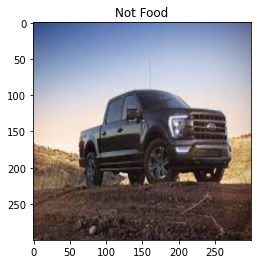

In [87]:
make_prediction(image)